### Name : Khushnuma bano Siddiqui

# Introduction:

### Natural Language Processing (NLP): 
The discipline of computer science, artificial intelligence and linguistics that is concerned with the creation of computational models that process and understand natural language. These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more.




### Sentiment Analysis: 
It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.


### In this notebook, we'll develop a Sentiment Analysis model to categorize a tweet as SAD or HAPPY.

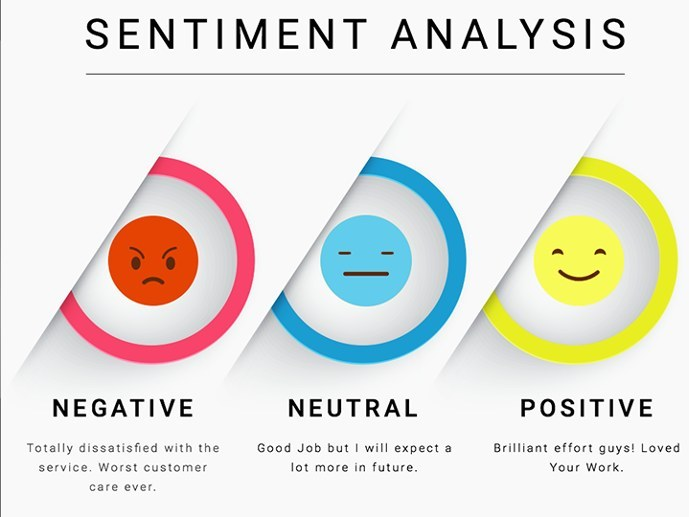

## Task: Develop a sentiment analyzer model to analyze twitter reviews and classify them as sad or happy.
1. Use The dataset provided.
2. visualize the dataset.
3. Prepare the dataset for training.
4. Select the model.
5. Train and Test the Model.

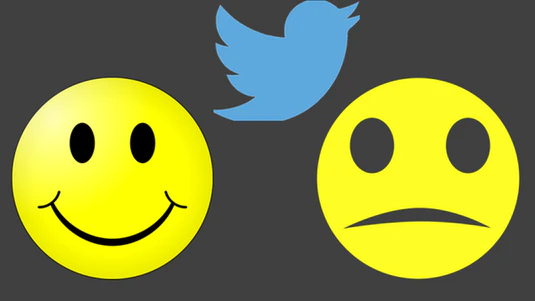

# Dataset Information

#### The objective of this task is to develop a sentiment analyze model to analyze twitter reviews and classify them as sad or happy tweets. 
Formally, given a training sample of SentimentText and Sentiment, where Sentimen label '1' denotes the tweet is "Happy" and Sentiment label '0' denotes the tweet is "Sad", your objective is to predict the labels on the test dataset.
The dataset is provided in the form of a csv file with each line storing a ItemID,Sentiment,SentimentText lits label and the tweet.

## Importing  Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings
warnings.filterwarnings('ignore')

##  Importing the Dataset

In [ ]:
df = pd.read_csv("Sentiment Analysis Dataset.csv", encoding = "ISO-8859-1") 

## Exploratory Data Analysis

In [ ]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
df.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [ ]:
df.shape

(1048575, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ItemID         1048575 non-null  int64 
 1   Sentiment      1048575 non-null  int64 
 2   SentimentText  1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Observations:

There are 0 Null value in data

In [ ]:
# Checking for Null values
df.isna().sum(axis = 0)

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [ ]:
df.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [ ]:
# displays duplicate records
print('Number of duplicate rows =', df.duplicated().sum())

Number of duplicate rows = 0


In [ ]:
df.nunique()

ItemID           1048575
Sentiment              2
SentimentText    1048558
dtype: int64

In [ ]:
df = df[['SentimentText','Sentiment']]

In [ ]:
df.head()

,SentimentText,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0


In [ ]:
df['Sentiment'].head()

0    0
1    0
2    1
3    0
4    0
Name: Sentiment, dtype: int64

In [ ]:
# Check the number of Dependent values
df['Sentiment'].nunique()

2

In [ ]:
# Check unique Dependent Values
df['Sentiment'].unique()

array([0, 1])

In [ ]:
happy_df = df[df['Sentiment'] == 1]
sad_df = df[df['Sentiment'] == 0]

In [ ]:
happy_df.head()

,SentimentText,Sentiment
2,omg its already 7:30 :O,1
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,1
8,handed in my uniform today . i miss you ...,1
9,hmmmm.... i wonder how she my number @-),1
11,thanks to all the haters up in my face a...,1


In [ ]:
df['length'] = df['SentimentText'].apply(len)
df.head(10)

,SentimentText,Sentiment,length
0,is so sad for my APL frie...,0,61
1,I missed the New Moon trail...,0,51
2,omg its already 7:30 :O,1,37
3,.. Omgaga. Im sooo im gunna CRy. I'...,0,132
4,i think mi bf is cheating on me!!! ...,0,53
5,or i just worry too much?,0,42
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,1,41
7,Sunny Again Work Tomorrow :-| ...,0,61
8,handed in my uniform today . i miss you ...,1,53
9,hmmmm.... i wonder how she my number @-),1,46


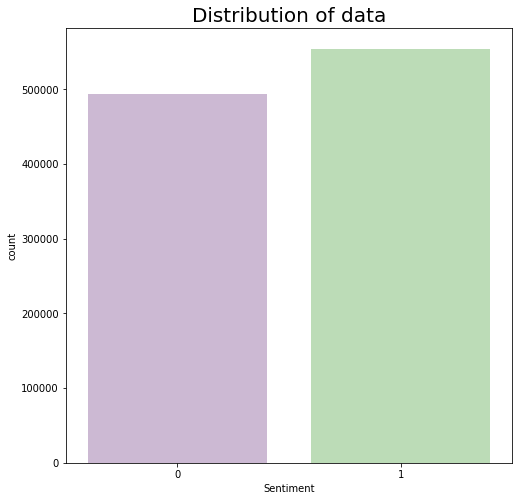

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.countplot(x = 'Sentiment',data = df)
plt.title('Distribution of data',fontsize = 20)
plt.show()

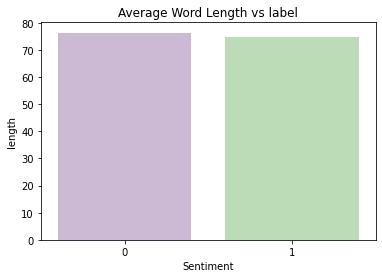

In [ ]:
sns.barplot('Sentiment','length',data = df,palette='PRGn')
plt.title('Average Word Length vs label')
plt.show()

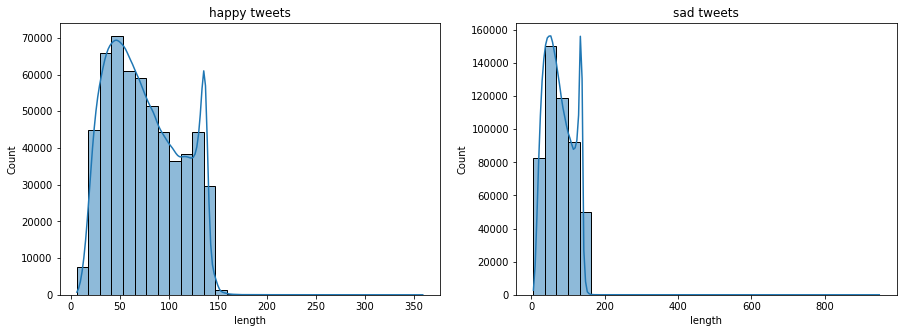

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df[df["Sentiment"] == 1]["length"],bins = 30,ax = ax1, kde=True).set(title = "happy tweets")
sns.histplot(df[df["Sentiment"] == 0]["length"],bins = 30,ax = ax2, kde = True).set(title = "sad tweets")
plt.show()

The distribution of both seems to be almost same. 150 to 180 characters in a tweet are the most common among both.



## Data preprocesing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')

def process_SentimentText(SentimentText):
    SentimentText =  " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",SentimentText.lower()).split())
    SentimentText = nltk.word_tokenize(SentimentText)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in SentimentText ]
    words = [word for word in stem if word not in stopwords.words('english')]
    tweet = " ".join(words)
    
    return tweet

df["clean_tweet"] = df["SentimentText"].apply(process_SentimentText)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,SentimentText,Sentiment,length,clean_tweet
0,is so sad for my APL frie...,0,61,sad apl friend
1,I missed the New Moon trail...,0,51,miss new moon trailer
2,omg its already 7:30 :O,1,37,omg alreadi 7 30
3,.. Omgaga. Im sooo im gunna CRy. I'...,0,132,omgaga im sooo im gunna cri thi dentist sinc 1...
4,i think mi bf is cheating on me!!! ...,0,53,think mi bf cheat


## Most frequent Word in tweet

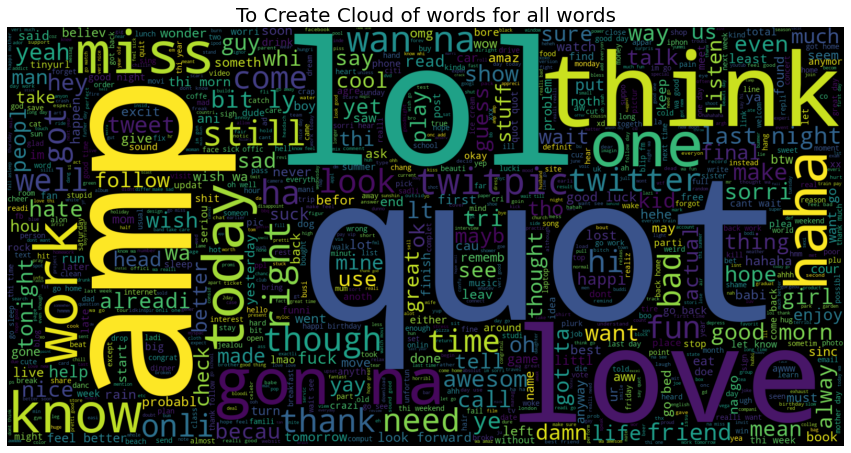

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sentiment_test = " ".join(review for review in df.clean_tweet)
wordcloud = WordCloud(max_words=1000,width = 1600 , height = 800,
                      background_color="black").generate(sentiment_test)
fig = plt.figure(figsize = (15, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for all words", fontsize = 20)
plt.show()

## Plot a cloud of words for Happy tweets

In [ ]:
happy_df = df[df['Sentiment'] == 1]
happy_df.head()

,SentimentText,Sentiment,length,clean_tweet
2,omg its already 7:30 :O,1,37,omg alreadi 7 30
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,1,41,juuuuuuuuuuuuuuuuussssst chillin
8,handed in my uniform today . i miss you ...,1,53,hand uniform today miss alreadi
9,hmmmm.... i wonder how she my number @-),1,46,hmmmm wonder number
11,thanks to all the haters up in my face a...,1,61,thank hater face day 112 102


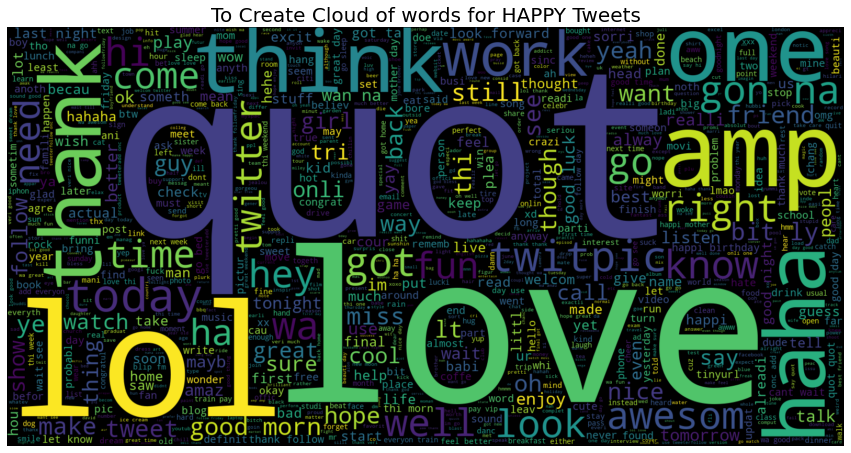

In [ ]:

sentiment_test = " ".join(review for review in happy_df.clean_tweet)
wordcloud = WordCloud(max_words=1000, width = 1600 , height = 800,
                      background_color="black").generate(sentiment_test)
fig = plt.figure(figsize = (15, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for HAPPY Tweets", fontsize = 20)
plt.show()

# Plot a cloud of words for sad tweets

In [ ]:
sad_df = df[df['Sentiment'] == 0]
sad_df.head()

,SentimentText,Sentiment,length,clean_tweet
0,is so sad for my APL frie...,0,61,sad apl friend
1,I missed the New Moon trail...,0,51,miss new moon trailer
3,.. Omgaga. Im sooo im gunna CRy. I'...,0,132,omgaga im sooo im gunna cri thi dentist sinc 1...
4,i think mi bf is cheating on me!!! ...,0,53,think mi bf cheat
5,or i just worry too much?,0,42,worri much


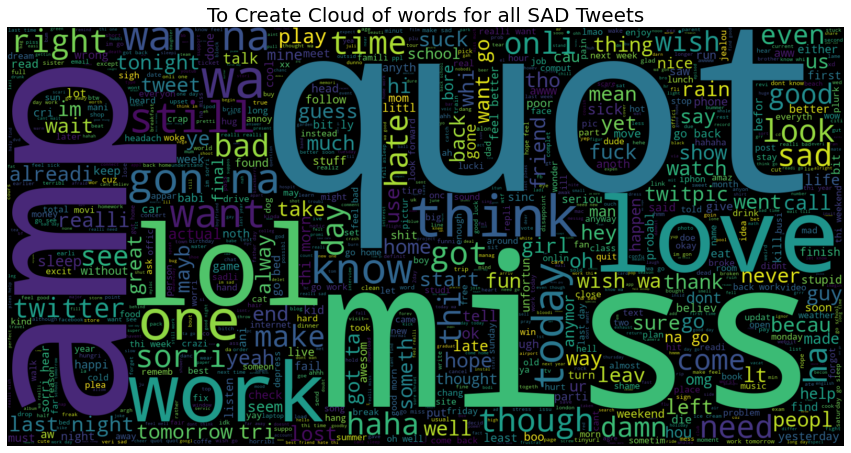

In [ ]:
sentiment_test = " ".join(review for review in sad_df.clean_tweet)
wordcloud = WordCloud(max_words=1000, width = 1600 , height = 800,
                      background_color="black").generate(sentiment_test)
fig = plt.figure(figsize = (15, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for all SAD Tweets" ,fontsize = 20)
plt.show()

## Transforming Dataset using TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
x = vectorizer.fit_transform(df["clean_tweet"])

In [ ]:
 # x[0].toarray()

# Splitting the data into Train and Test Subset

In [ ]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,df["Sentiment"],test_size = 0.05, random_state = 42)


##  Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.791522866408838

In [ ]:
accuracy_score(y_test,pred)

0.7707184954891377

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.7868887174600294

In [ ]:
pred_prob[0][1] >= 0.3


True